## Video games (mini-project)

**Importing libraries**

In [5]:
import pandas as pd
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Importing dataset from a csv zipped file in the working directory**

In [6]:
df = pd.read_csv('games.zip', compression='zip')

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


**Checking column names**

In [7]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

**data description:**
* Rank – by sales
* Name – game title
* Platform 
* Year – release year
* Genre
* Publisher
* NA_Sales – sales in North America, MM
* EU_Sales – sales in Europe, MM
* JP_Sales – sales in Japam, MM
* Other_Sales – sales in other regions, MM
* Global_Sales – total sales, MM


**Checking columns datatypes**

In [8]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

**Checking general info**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


**Checking missing values**

In [10]:
df[df['Year'].isna() == True]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


**Dropping missing values**

In [11]:
df.dropna(inplace=True)

**Re-checking info**  
the number of non-null values is equal for all columns now after dropping missing values

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


**Checking general descriptive statistics**

In [13]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


**Checking general descriptive statistics for the column 'Year'**

In [14]:
df.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

**Finding the mode value for Years**

In [15]:
st.mode(df.Year)

ModeResult(mode=array([2009.]), count=array([1431]))

**Finding the number of games published before 2008**

In [16]:
df[df['Year'] < 2008].shape[0]

8298

**Finding the number of games published after 2007**

In [17]:
df[df['Year'] >= 2008].shape[0]

7993

**Plotting global sales disribution by year**

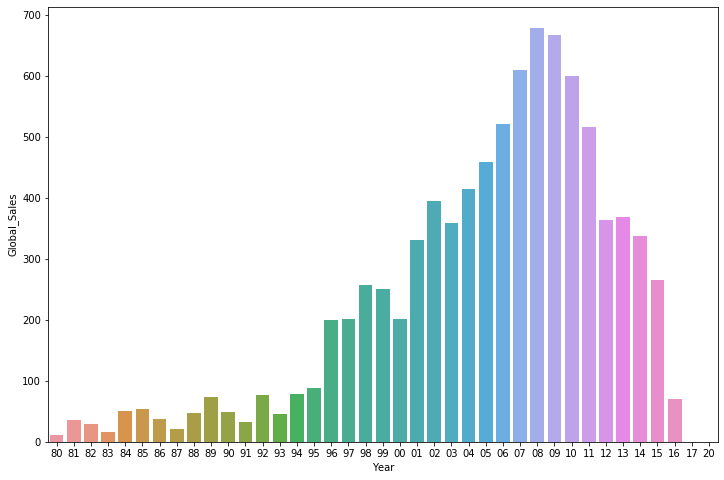

In [18]:
global_sales = df.groupby('Year', as_index=False).agg({'Global_Sales': 'sum'})

labels = []
for i in range(1980, 2021):
    if i in global_sales.Year.to_list():
        labels.append(str(i)[2:])
    
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=global_sales.Year, y=global_sales.Global_Sales)
ax.set_xticklabels(labels);

**Finding platforms having more than 7% of overall releases**

In [19]:
platforms_count = df.groupby('Platform') \
    .agg({'Rank': 'count'}) \
    .sort_values('Rank', ascending=False) \
    .rename(columns={'Rank': 'platforms_count'})

platforms_count['platforms_count_percent'] = round(100 * platforms_count.platforms_count / platforms_count.platforms_count.sum(), 2)

platforms_count[platforms_count.platforms_count_percent > 7]

,platforms_count,platforms_count_percent
Platform,,
DS,2131,13.08
PS2,2127,13.06
PS3,1304,8.00
Wii,1290,7.92
X360,1234,7.57
PSP,1197,7.35
PS,1189,7.30


**Saving names of such platforms to a list**

In [120]:
platforms_count[platforms_count.platforms_count_percent > 7].index.to_list()

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

**Finding the top-5 most active/productive publishers**

In [20]:
df.Publisher.value_counts().head()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
Name: Publisher, dtype: int64

**Find mean, median and standard deviation for Nintendo sales**

In [123]:
df[df['Publisher'] == 'Nintendo'][['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,696.000000,696.000000,696.000000,696.000000
mean,1.172055,0.601006,0.653721,0.136767
std,2.989913,1.743953,1.063110,0.464170
min,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.007500,0.090000,0.000000
50%,0.375000,0.120000,0.280000,0.030000
75%,0.972500,0.482500,0.740000,0.090000
max,41.490000,29.020000,10.220000,8.460000


**Have a look at Nintendo sales in Japan by genre (plot the data)**

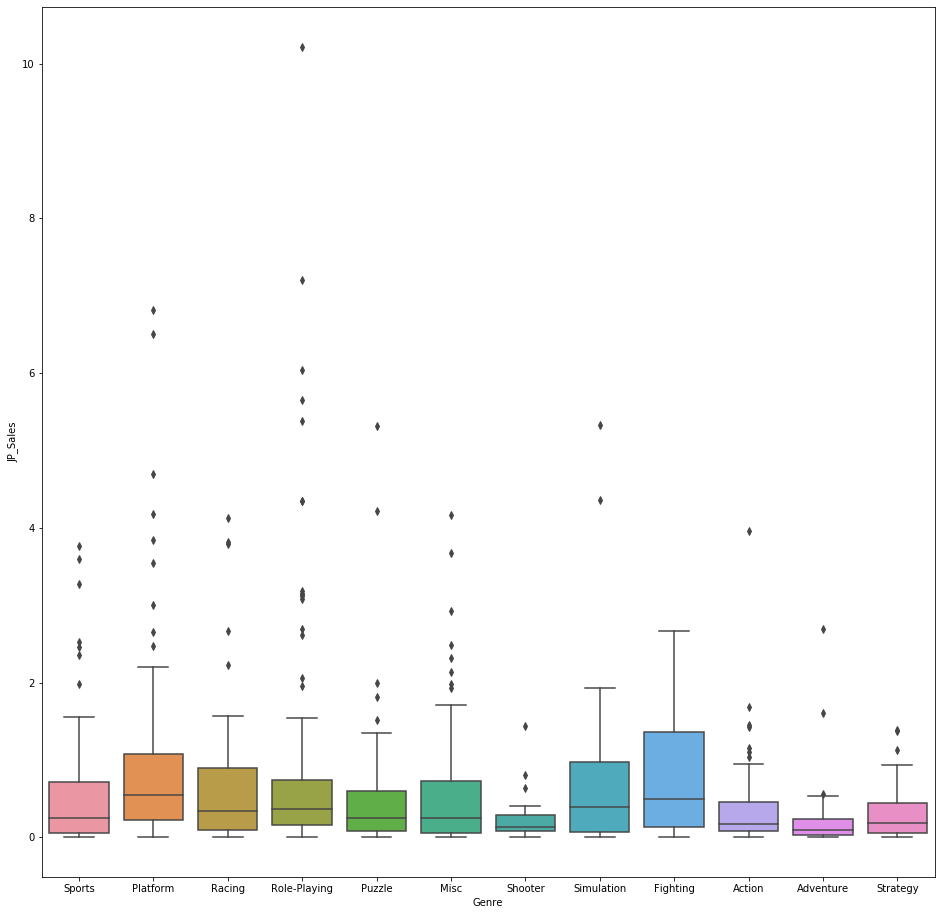

In [128]:
nintendo_japan = df[df['Publisher'] == 'Nintendo'][['Genre', 'JP_Sales']]

plt.figure(figsize=(16, 16))
sns.boxplot(x=nintendo_japan.Genre, y=nintendo_japan.JP_Sales)

**Visualize the dynamic of global sales for Fighting, Simulation, Platform, Racing, Sports genres (Nintendo platform)**

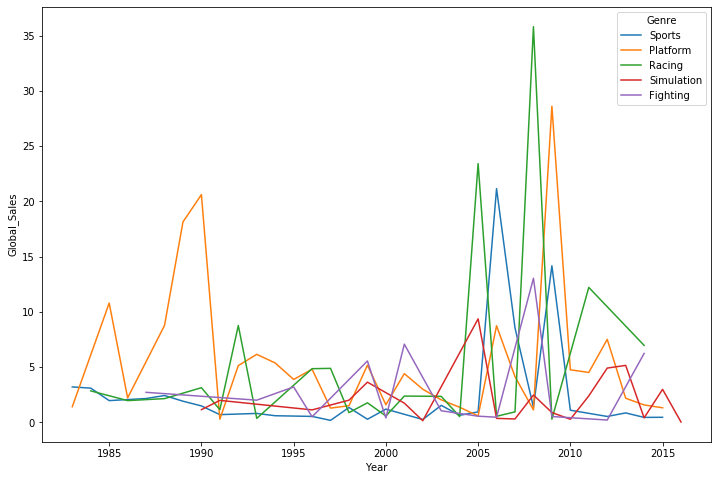

In [156]:
genres = ['Fighting', 'Simulation', 'Platform', 'Racing', 'Sports']
global_nintendo = df[(df['Publisher'] == 'Nintendo')].query('Genre in @genres')
global_nintendo['Year'] = global_nintendo.Year.astype(int)

plt.figure(figsize=(12, 8))
sns.lineplot(ci=None, y=global_nintendo.Global_Sales, x=global_nintendo.Year, hue=global_nintendo.Genre);